<a href="https://colab.research.google.com/github/xteox017/Sintesis-de-reuniones-con-IA-Equipo-31-TEC/blob/main/Avance1_Equipo31.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Maestría en Inteligencia Artificial Aplicada**

PROYECTO INTEGRADOR

ANALISIS EXPLORATORIO DE LOS DATOS

Equipo 31

JUAN CARLOS VILLAMIL ROJAS A01794003

MATEO CRUZ LANCHERO A01793882

ANDREA MARGARITA OSORIO GONZÁLEZ A01104776

5/5/2024

In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import os
import string
from wordcloud import WordCloud

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [96]:
# Montar Google Drive para acceder a los archivos .txt
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [97]:
# Especificar la ruta a los archivos
data_path = '/content/drive/My Drive/Transcriptions/'

# Leer los archivos .txt en un dataframe
archivos = [f for f in os.listdir(data_path) if f.endswith('.txt')]
transcripciones = []

for archivo in archivos:
    with open(os.path.join(data_path, archivo), 'r', encoding='utf-8') as f:
        texto = f.read()
        transcripciones.append(texto)



In [98]:
tokens = []
for texto in transcripciones:
    tokens_texto = word_tokenize(texto.lower())
    tokens.append(tokens_texto)

stop_words = set(stopwords.words('spanish'))
print(stop_words)
stop_words.update(['eh', 'si', 'va', 'pues', '[', ']', 'entonces', '...', '.', ',', ''])

{'esta', 'será', 'como', 'tuviste', 'teníais', 'qué', 'estarías', 'tuya', 'entre', 'tendrás', 'un', 'mí', 'quienes', 'muy', 'estarán', 'estaríamos', 'estos', 'seríais', 'algo', 'estabas', 'unos', 'habríamos', 'quien', 'hubiera', 'ese', 'fuisteis', 'tuvisteis', 'tendríamos', 'mío', 'tuvo', 'todos', 'te', 'estaréis', 'tuviesen', 'míos', 'esos', 'cual', 'estando', 'estén', 'le', 'habéis', 'habida', 'tenían', 'tendría', 'hubieron', 'ti', 'tuviésemos', 'serás', 'vuestra', 'nuestra', 'sobre', 'seréis', 'nos', 'tienes', 'tened', 'vosotros', 'a', 'nosotros', 'fuese', 'seríamos', 'tuyas', 'tendremos', 'el', 'haya', 'hubiésemos', 'que', 'estuvieras', 'están', 'tengáis', 'estuvieron', 'hay', 'tendrías', 'los', 'hubieran', 'os', 'estada', 'habréis', 'serán', 'estarían', 'poco', 'sentid', 'otra', 'sean', 'estuvimos', 'habrían', 'hayáis', 'estés', 'estuviese', 'sin', 'seremos', 'era', 'estar', 'está', 'he', 'serías', 'tenía', 'hubiéramos', 'hayas', 'seamos', 'mías', 'eres', 'habías', 'este', 'lo', '

In [99]:
tokens_sin_stop_words = []
for tokens_texto in tokens:
    tokens_limpios = [token for token in tokens_texto if token not in stop_words]
    tokens_sin_stop_words.append(tokens_limpios)

tokens_sin_puntuacion = []
for tokens_texto in tokens_sin_stop_words:
    tokens_limpios = [token for token in tokens_texto if token not in string.punctuation]
    tokens_sin_puntuacion.append(tokens_limpios)

In [100]:
lemmatizer = WordNetLemmatizer()
tokens_lemmatized = []
for tokens_texto in tokens_sin_puntuacion:
    tokens_lemmatized_texto = [lemmatizer.lemmatize(token) for token in tokens_texto]
    tokens_lemmatized.append(tokens_lemmatized_texto)

In [101]:
# Estadísticas de la cantidad de palabras por reunión
cantidad_palabras_reunion = [len(tokens_texto) for tokens_texto in tokens_lemmatized]
df_palabras = pd.DataFrame({'Cantidad de palabras': cantidad_palabras_reunion})
print(df_palabras.describe())

       Cantidad de palabras
count             19.000000
mean            1545.894737
std             1230.641427
min              237.000000
25%              628.000000
50%             1435.000000
75%             2001.000000
max             5113.000000


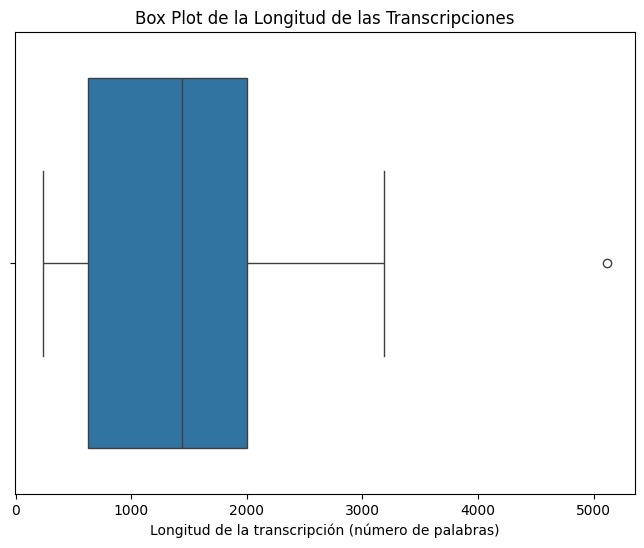

In [102]:
# Box plot para la longitud de palabras por transcripción
plt.figure(figsize=(8, 6))
sns.boxplot(x=cantidad_palabras_reunion)
plt.xlabel('Longitud de la transcripción (número de palabras)')
plt.title('Box Plot de la Longitud de las Transcripciones')
plt.show()

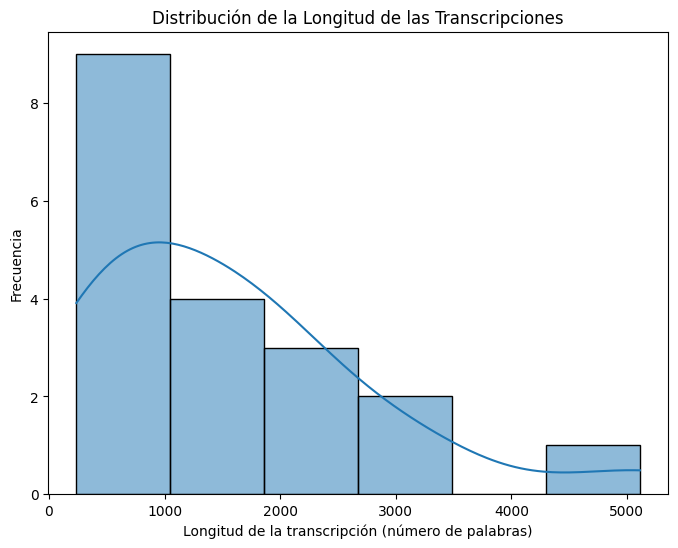

In [103]:
# Histograma para la distribución de la longitud de las transcripciones
plt.figure(figsize=(8, 6))
sns.histplot(x=cantidad_palabras_reunion, kde=True)
plt.xlabel('Longitud de la transcripción (número de palabras)')
plt.ylabel('Frecuencia')
plt.title('Distribución de la Longitud de las Transcripciones')
plt.show()

In [104]:
from collections import Counter

todas_las_palabras = [token for tokens_texto in tokens_lemmatized for token in tokens_texto]
frecuencia_palabras = Counter(todas_las_palabras)
print(frecuencia_palabras.most_common(20)) # Mostrar las 20 palabras más frecuentes

[('bueno', 254), ('ser', 216), ('ejemplo', 213), ('música', 204), ('creo', 197), ('bien', 176), ('puede', 165), ('tener', 152), ('hacer', 147), ('ahora', 141), ('persona', 135), ('veces', 118), ('gente', 117), ('tiempo', 114), ('cómo', 113), ('vamos', 112), ('muchas', 102), ('decir', 99), ('gracias', 99), ('importante', 95)]


In [105]:
frecuencia_palabras_por_reunion = []
for tokens_texto in tokens_lemmatized:
  frecuencia_palabras_reunion = Counter(tokens_texto)
  frecuencia_palabras_por_reunion.append(frecuencia_palabras_reunion)

Index(['india', 'música', 'productos', 'felicidad', 'bueno', 'retail',
       'sector', 'inteligencia', 'tener', 'artificial'],
      dtype='object')


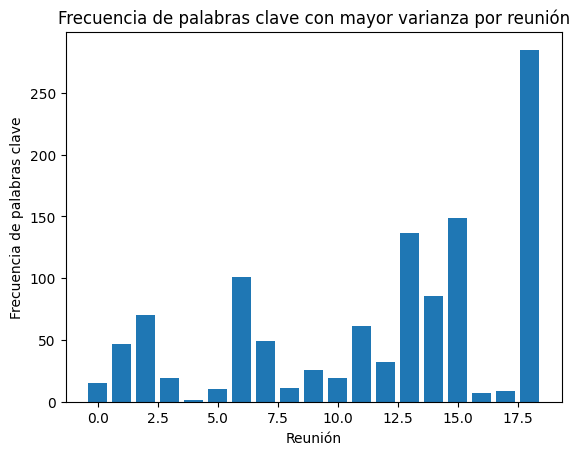

In [106]:
# Crear un DataFrame para almacenar la frecuencia de las palabras
df_frecuencias = pd.DataFrame(frecuencia_palabras_por_reunion)
df_frecuencias = df_frecuencias.fillna(0)  # Rellenar valores faltantes con 0

# Calcular la varianza de la frecuencia de cada palabra
varianzas = df_frecuencias.var()

# Seleccionar las 10 palabras con mayor varianza
palabras_clave = varianzas.sort_values(ascending=False).index[:10]
print(palabras_clave)

# Calcular la frecuencia de las palabras clave por reunión
frecuencia_palabras_clave = []
for tokens_texto in tokens_lemmatized:
    frecuencia_palabras_clave_reunion = [token for token in tokens_texto if token in palabras_clave]
    frecuencia_palabras_clave.append(len(frecuencia_palabras_clave_reunion))

# Graficar la frecuencia de las palabras clave por reunión
plt.bar(range(len(archivos)), frecuencia_palabras_clave)
plt.xlabel('Reunión')
plt.ylabel('Frecuencia de palabras clave')
plt.title('Frecuencia de palabras clave con mayor varianza por reunión')
plt.show()

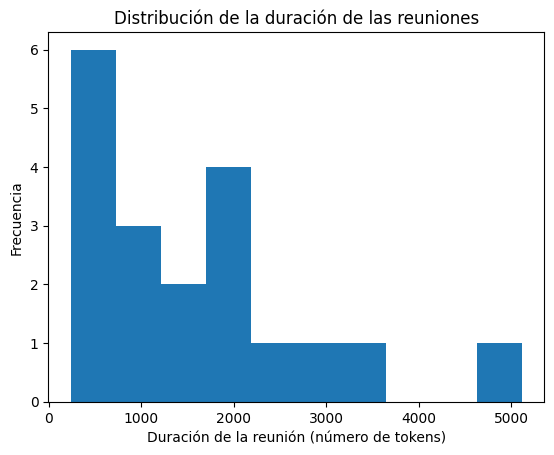

In [107]:
duracion_reuniones = [len(tokens_texto) for tokens_texto in tokens_lemmatized]
plt.hist(duracion_reuniones, bins=10)
plt.xlabel('Duración de la reunión (número de tokens)')
plt.ylabel('Frecuencia')
plt.title('Distribución de la duración de las reuniones')
plt.show()

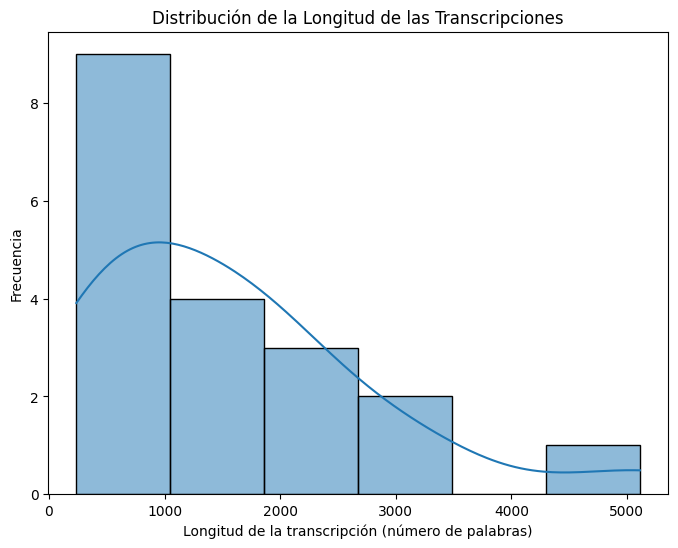

In [108]:
# Gráfica sns.histplot para la distribución de la longitud de las transcripciones
plt.figure(figsize=(8, 6))
sns.histplot(x=cantidad_palabras_reunion, kde=True)
plt.xlabel('Longitud de la transcripción (número de palabras)')
plt.ylabel('Frecuencia')
plt.title('Distribución de la Longitud de las Transcripciones')
plt.show()

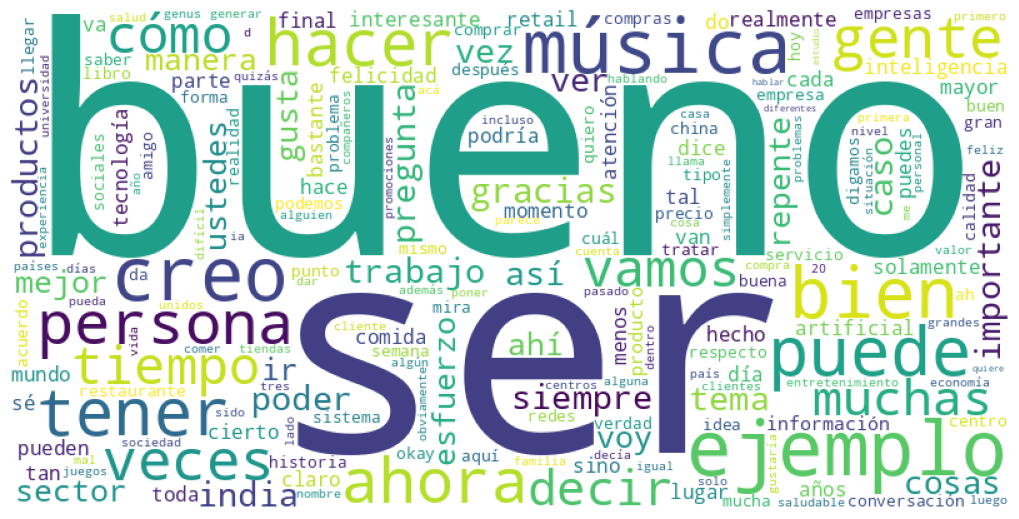

In [109]:
# Nube de palabras
todas_las_palabras = [token for tokens_texto in tokens_lemmatized for token in tokens_texto]
frecuencia_palabras = Counter(todas_las_palabras)

wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(frecuencia_palabras)
plt.figure(figsize=(10, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()